=== Summary Clean (price, rating) ===
              price        rating
count  11369.000000  11369.000000
mean     156.873527      3.931190
std      324.337028      1.185883
min        0.000000      0.000000
25%       41.990000      3.900000
50%       89.000000      4.300000
75%      180.640000      4.500000
max    26000.000000      5.000000 



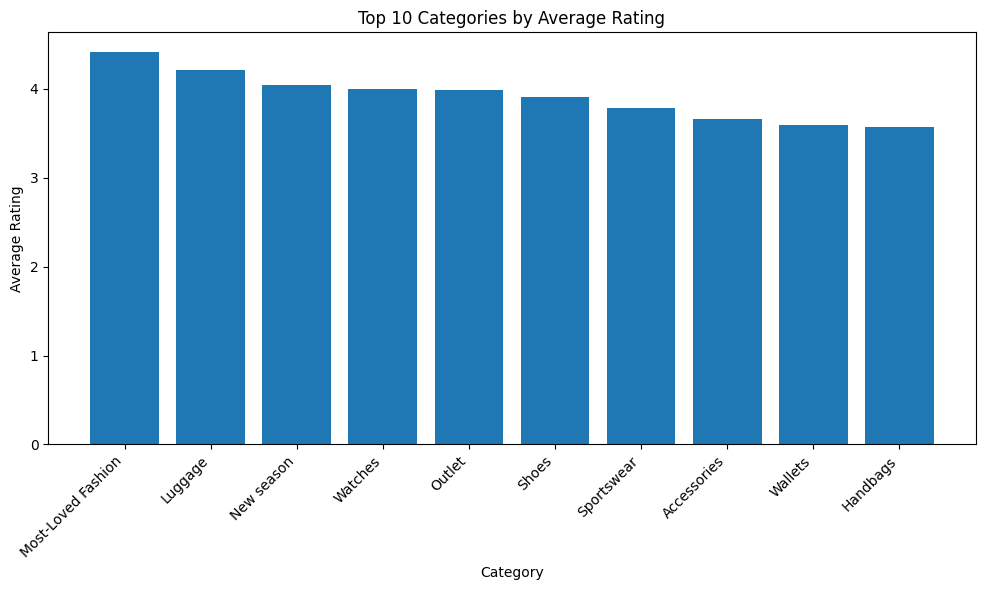

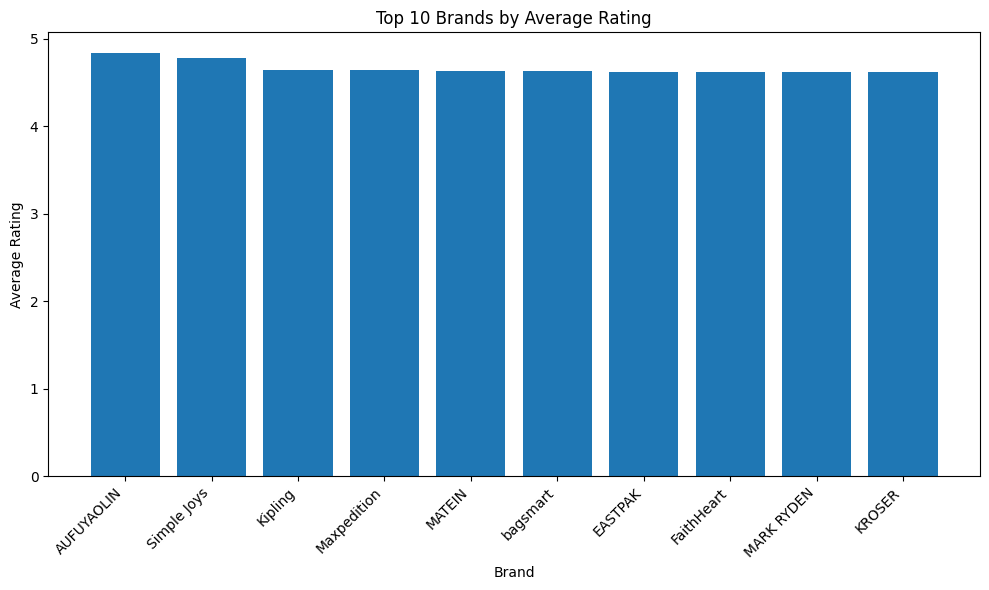

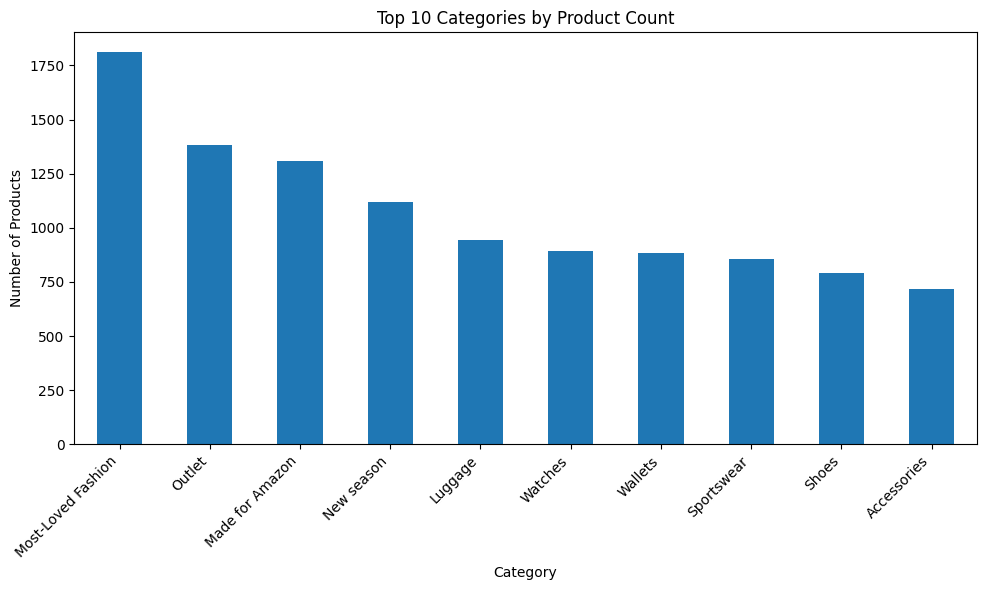

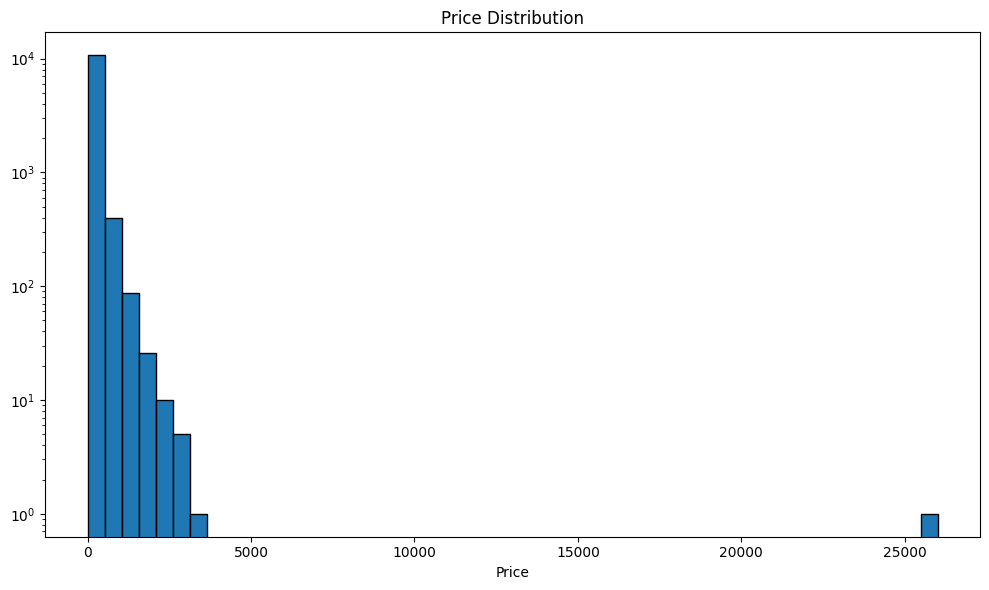

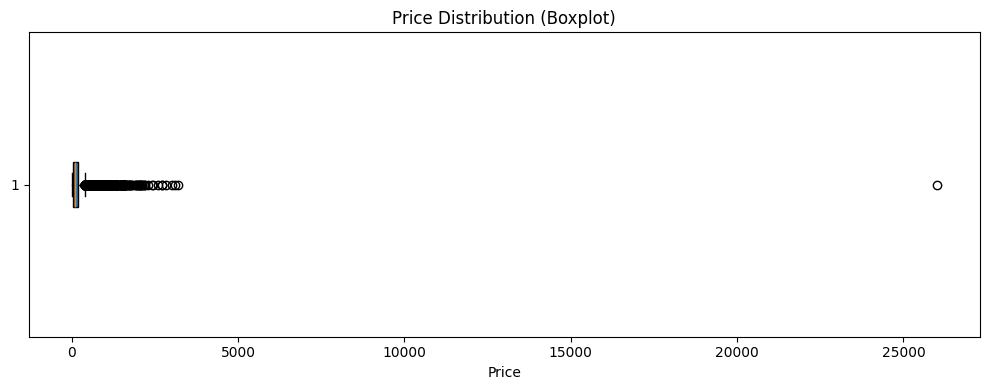

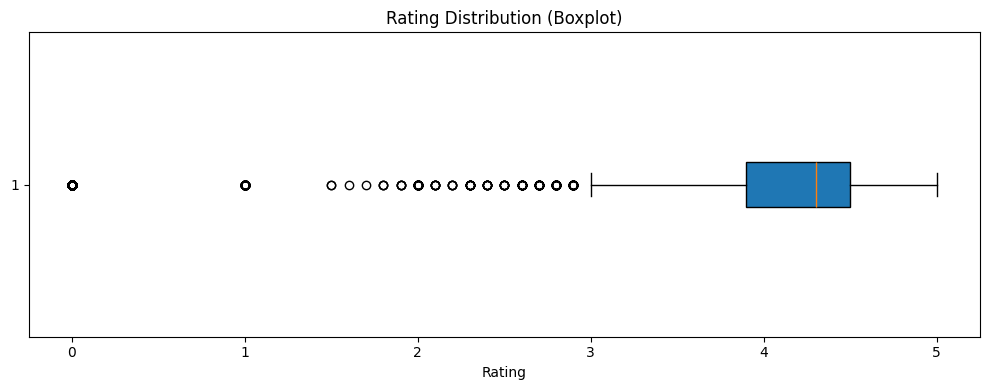

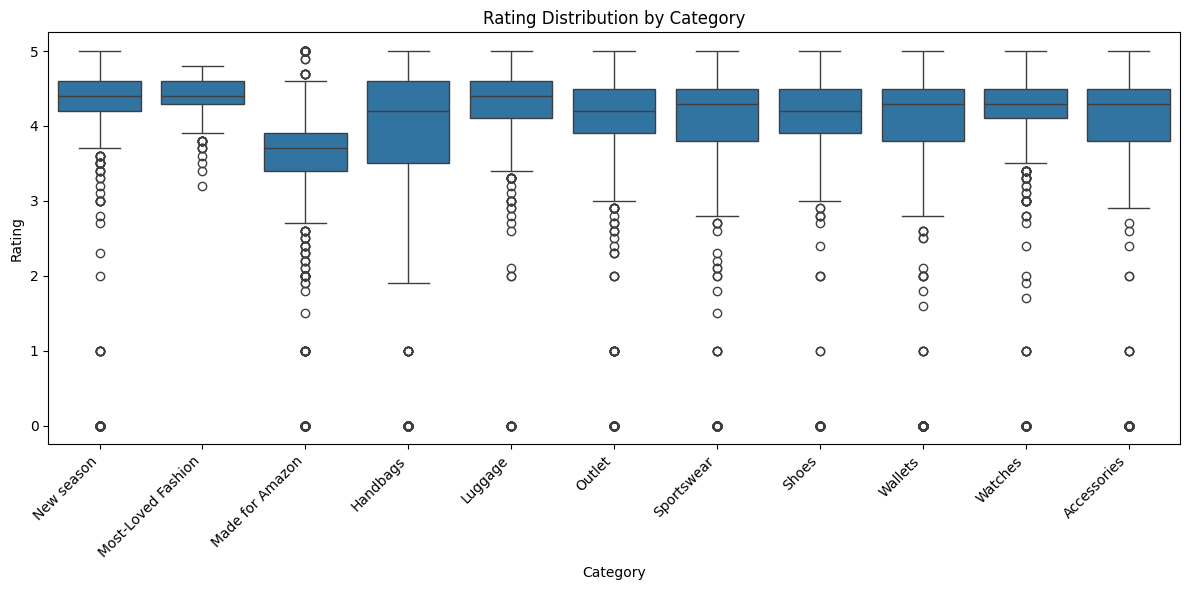

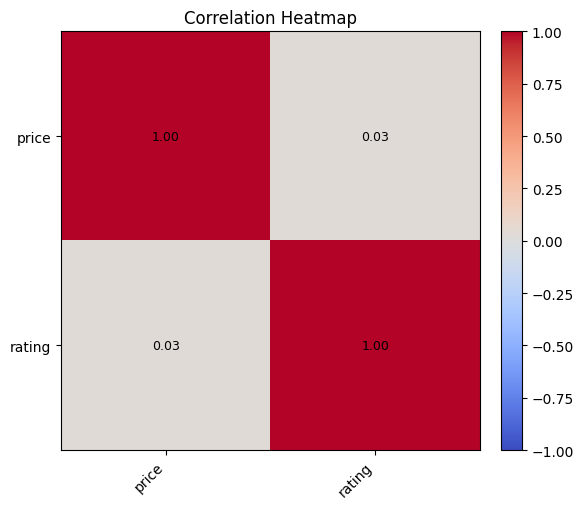

Correlation (price vs rating): 0.030


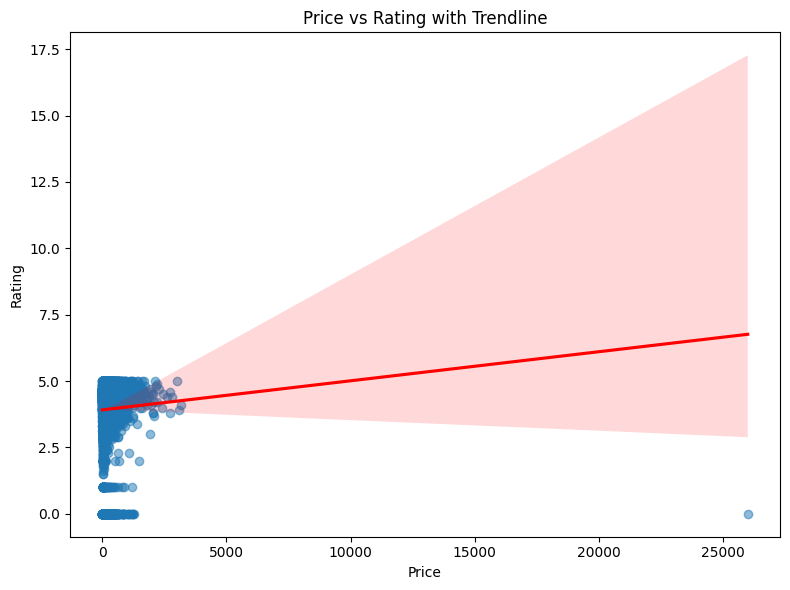

In [ ]:
# Amazon Fashion Sales - EDA Analyis
# Load and import tools for visualizations and data organization

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load, convert, and summarize clean data set
df = pd.read_csv("products_clean.csv")

# Ensure all values in the “price” and “rating” columns are numeric
for c in ["price", "rating"]:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce")

# Summarize data set
summary_clean = df[["price", "rating"]].describe()
print("=== Summary Clean (price, rating) ===")
print(summary_clean, "\n")

#1) 1st Analysis/Visualization - Top 10 Categories by Average
# Remove rows where category or rating is missing, then group the data by category and average rating
max_stats = (
    df.dropna(subset=["category", "rating"])
      .groupby("category", as_index=False)
      .agg(avg_rating=("rating", "mean"),
           count=("rating", "size"))
)
# Create variable that sorts the top average ratings
max_stats = max_stats.sort_values("avg_rating", ascending=False)
top_n = 10
max_cats = max_stats.head(top_n)
# Plot the bar chart with the top categories based on ratings
plt.figure(figsize=(10, 6))
plt.bar(max_cats["category"], max_cats["avg_rating"])
plt.title(f"Top {top_n} Categories by Average Rating")
plt.xlabel("Category")
plt.ylabel("Average Rating")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

#2) 2nd Analysis/Visualizations - Top 10 Brands by Average Rating, Top 10 Categories by Product Count

# Remove any missing values from "brand" and "rating" columns, group data by brand, and average each brand's ratings
brand_stats = (
    df.dropna(subset=["brand", "rating"])
      .groupby("brand", as_index=False)
      .agg(avg_rating=("rating", "mean"),
           count=("rating", "size"))
)

# Sort brands with their average ratings, and also ensure that these brands have at least 5 products
brand_stats = brand_stats.sort_values("avg_rating", ascending=False)
top_brands = brand_stats[brand_stats["count"] >= 5].head(top_n)

# Plot bar chart - top 10 brands and average ratings
plt.figure(figsize=(10, 6))
plt.bar(top_brands["brand"], top_brands["avg_rating"])
plt.title(f"Top {top_n} Brands by Average Rating")
plt.xlabel("Brand")
plt.ylabel("Average Rating")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Plot top 10 categories by product count
plt.figure(figsize=(10, 6))
(df["category"]
   .value_counts()
   .head(10)
   .plot(kind="bar"))
plt.title("Top 10 Categories by Product Count")
plt.xlabel("Category")
plt.ylabel("Number of Products")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


#3) 3rd Analyis/ Visualization - Histogram for Price Distribution (among all products)
# Drop any missing values in the price columns and ensure these values are greater than 0
prices = df["price"].dropna()
prices = prices[prices > 0]
# Use histogram function to display Price Distribution among all products
plt.figure(figsize=(10, 6))
plt.hist(prices, bins=50, edgecolor="black")

# Use log so that histogram will be more distinct and organized
plt.yscale("log")
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("")
plt.tight_layout()
plt.show()

#4) 4th Analysis/ Visualizations - Box plots for price distributions and ratings
# drop any missing or NaN values in the "rating" column
ratings = df["rating"].dropna()

# use previous "prices" variable to plot
plt.figure(figsize=(10, 4))
plt.boxplot(prices, vert=False, patch_artist=True)
plt.title("Price Distribution (Boxplot)")
plt.xlabel("Price")
plt.tight_layout()
plt.show()

# use "ratings" variable to create plot
plt.figure(figsize=(10, 4))
plt.boxplot(ratings, vert=False, patch_artist=True)
plt.title("Rating Distribution (Boxplot)")
plt.xlabel("Rating")
plt.tight_layout()
plt.show()

#  Create boxplot for rating distribution by category
#
if "category" in df.columns:
    max_cats = df["category"].value_counts().index

    df_topcats = df[df["category"].isin(max_cats)].dropna(subset=["rating"])

    plt.figure(figsize=(12, 6))
    sns.boxplot(x="category", y="rating", data=df_topcats)
    plt.title(f"Rating Distribution by Category")
    plt.xlabel("Category")
    plt.ylabel("Rating")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

    # 5) 5th Analysis/ Visualization - Correlation heatmap to look find correlation between price and rating

    # select only numeric columns
num_cols = df.select_dtypes(include="number").columns

# get correlation between numeric columns
corr = df[num_cols].corr()
# plot heatmap
plt.figure(figsize=(1.6*len(num_cols)+3, 1.6*len(num_cols)+2))
im = plt.imshow(corr, vmin=-1, vmax=1, cmap="coolwarm")
plt.xticks(np.arange(len(num_cols)), num_cols, rotation=45, ha="right")
plt.yticks(np.arange(len(num_cols)), num_cols)
plt.title("Correlation Heatmap")
# add labels to heatmap
for i in range(len(num_cols)):
    for j in range(len(num_cols)):
        plt.text(j, i, f"{corr.iloc[i, j]:.2f}", ha="center", va="center", fontsize=9)
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.tight_layout()
plt.show()

# 6) 6th Analysis/ Visualization - Create scatterplot to visualize correlation between price and rating

# measure correlation between price and rating
corr_value = df["price"].corr(df["rating"])
# print the correlation value
print(f"Correlation (price vs rating): {corr_value:.3f}")
# plot scatterplot, and include trendline within visualization
plt.figure(figsize=(8, 6))
sns.regplot(x="price", y="rating", data=df, scatter_kws={"alpha":0.5}, line_kws={"color":"red"})
plt.title("Price vs Rating with Trendline")
plt.xlabel("Price")
plt.ylabel("Rating")
plt.tight_layout()
plt.show()




